In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
df = pd.read_sas('./data/LLCP2021.XPT')

In [3]:
df_describe = False

In [4]:
# drop s0q1, interview state
# drop s0q8, file month
# drop s0q9, interview date
# drop s0q10, interview month
# drop s0q11, interview day
# drop s0q12, interview year
# drop s0q14, final disposition, can use for dropping partial interviews
# drop s0q15, annual sequence number
# drop s0q16, primary sampling unit

In [5]:
df = df[df.CTELENM1 != 2] # s0q1, dropping incorrect phone numbers

In [6]:
# drop s0q1, correct telephone number
# drop s0q2, private residence
# drop s0q3, college housing
# drop s0q4, resident of state
# drop s0q5, cellular telephone
# drop s0q6, 18 or older
# drop s0q7, college male or female
# drop s0q8, number af adults in household
# drop s0q9, landline sex
# drop s0q10, number of adult men in household
# drop s0q11, number of adult women in household
# drop s0q12, respondent selection
# drop s0q1, safe time to talk
# drop s0q2, correct phone number
# drop s0q3, is this a cell phone
# drop s0q4, 18 years or older cell phone
# drop s0q5, cell phone male or female
# drop s0q6, private residence cell phone
# drop s0q7, cell phone college housing
# drop s0q8, cell phone state confirmation
# drop s0q10, do you have a landline as well
# drop s0q11, number of adults in household

In [7]:
df = df.drop(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', 'DISPCODE', '_PSU', 'CTELENM1', 
                'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1','COLGSEX', 'NUMADULT', 'LANDSEX', 'NUMMEN', 
              'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5',
               'CADULT1','CELLSEX', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT'], axis=1)

In [8]:
pd.isna(df["SEXVAR"]).value_counts() # no nans

False    438691
Name: SEXVAR, dtype: int64

In [9]:
df = df[df['GENHLTH'] != 7]
df = df[df['GENHLTH'] != 9]

In [10]:
df['GENHLTH'] = df['GENHLTH'].replace(1,0)
df['GENHLTH'] = df['GENHLTH'].replace(2,1)
df['GENHLTH'] = df['GENHLTH'].replace(3,2)
df['GENHLTH'] = df['GENHLTH'].replace(4,3)
df['GENHLTH'] = df['GENHLTH'].replace(5,4)

In [11]:
df = df.dropna(subset=['GENHLTH'])

In [12]:
df["GENHLTH"].value_counts()

1.0    149110
2.0    137938
0.0     77741
3.0     54736
4.0     18005
Name: GENHLTH, dtype: int64

In [13]:
df['unk_PHYSHLTH'] = df['PHYSHLTH']
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].replace(range(1,31), 0)
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].replace(88, 0)
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].replace(99, 1)
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].replace(77, 1)
df['unk_PHYSHLTH'] = df['unk_PHYSHLTH'].fillna(1)
df['unk_PHYSHLTH'].describe() if df_describe else ''

''

In [14]:
df['PHYSHLTH'] = df['PHYSHLTH'].replace(88,0)
df['PHYSHLTH'] = df['PHYSHLTH'].replace(77,0)
df['PHYSHLTH'] = df['PHYSHLTH'].replace(99,0)
df['PHYSHLTH'] = df['PHYSHLTH'].fillna(0)
df['PHYSHLTH'].describe()

count    437530.000000
mean          3.706816
std           8.272157
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: PHYSHLTH, dtype: float64

In [15]:
df['unk_MENTHLTH'] = df['MENTHLTH']
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].replace(range(1,31), 0)
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].replace(88, 0)
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].replace(99, 1)
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].replace(77, 1)
df['unk_MENTHLTH'] = df['unk_MENTHLTH'].fillna(1)
df['unk_MENTHLTH'].describe() if df_describe else ''

''

In [16]:
df['MENTHLTH'] = df['MENTHLTH'].replace(88,0)
df['MENTHLTH'] = df['MENTHLTH'].replace(77,0)
df['MENTHLTH'] = df['MENTHLTH'].replace(99,0)
df['MENTHLTH'] = df['MENTHLTH'].fillna(0)
df['MENTHLTH'].describe() if df_describe else ''

''

In [17]:
df['unk_POORHLTH'] = df['POORHLTH']
df['unk_POORHLTH'] = df['unk_POORHLTH'].replace(range(1,31), 0)
df['unk_POORHLTH'] = df['unk_POORHLTH'].replace(88, 0)
df['unk_POORHLTH'] = df['unk_POORHLTH'].replace(99, 1)
df['unk_POORHLTH'] = df['unk_POORHLTH'].replace(77, 1)
df['unk_POORHLTH'] = df['unk_POORHLTH'].fillna(0)
df['unk_POORHLTH'].describe() if df_describe else ''

''

In [18]:
df['POORHLTH'] = df['POORHLTH'].replace(88,0)
df['POORHLTH'] = df['POORHLTH'].replace(77,0)
df['POORHLTH'] = df['POORHLTH'].replace(99,0)
df['POORHLTH'] = df['POORHLTH'].fillna(0)
df['POORHLTH'].describe() if df_describe else ''

''

In [19]:
# drop s3q1:PRIMINSR, health care access, _EDUCAG is a better metric
df = df.drop(['PRIMINSR'], axis=1)

In [20]:
df['unk_has_doc'] = df['PERSDOC3']
df['unk_has_doc'] = df['unk_has_doc'].replace([1,2,3],0)
df['unk_has_doc'] = df['unk_has_doc'].replace([7,9],1)
df['unk_has_doc'] = df['unk_has_doc'].fillna(1)
df['unk_has_doc'].describe() if df_describe else ''

''

In [21]:
# has a personal doctor
df['has_doc'] = df['PERSDOC3']
df.drop(columns=['PERSDOC3'])
df['has_doc'] = df['has_doc'].replace(2,1)
df['has_doc'] = df['has_doc'].replace(3,0)
df['has_doc'] = df['has_doc'].replace(7,0)
df['has_doc'] = df['has_doc'].replace(9,0)
df = df.dropna(subset=['has_doc'])
df['has_doc'].describe() if df_describe else ''

''

In [22]:
df['unk_MEDCOST1'] = df['MEDCOST1']
df['unk_MEDCOST1'] = df['unk_MEDCOST1'].replace([1,2],0)
df['unk_MEDCOST1'] = df['unk_MEDCOST1'].replace([7,9],1)
df['unk_MEDCOST1'] = df['unk_MEDCOST1'].fillna(1)
df['unk_MEDCOST1'].describe() if df_describe else ''

''

In [23]:
df['MEDCOST1'] = df['MEDCOST1'].replace(2,0)
df['MEDCOST1'] = df['MEDCOST1'].replace(7,0)
df['MEDCOST1'] = df['MEDCOST1'].replace(9,0)
df = df.dropna(subset=['MEDCOST1'])
df['MEDCOST1'].describe() if df_describe else ''

''

In [24]:
df['unk_past_year'] = df['CHECKUP1']
df['unk_past_year'] = df['unk_past_year'].replace([1,2,3,4,8],0)
df['unk_past_year'] = df['unk_past_year'].replace([7,9],1)
df['unk_past_year'] = df['unk_past_year'].fillna(1)
df['unk_past_year'].describe() if df_describe else ''

''

In [25]:
# within past year
df['past_year'] = df['CHECKUP1']
df.drop(columns=['CHECKUP1'])
df['past_year'] = df['past_year'].replace(2,0)
df['past_year'] = df['past_year'].replace(3,0)
df['past_year'] = df['past_year'].replace(4,0)
df['past_year'] = df['past_year'].replace(7,0)
df['past_year'] = df['past_year'].replace(8,0)
df['past_year'] = df['past_year'].replace(9,1)
df = df.dropna(subset=['past_year'])
df['past_year'].describe() if df_describe else ''

''

In [26]:
df['unk_EXERANY2'] = df['EXERANY2']
df['unk_EXERANY2'] = df['unk_EXERANY2'].replace([1,2],0)
df['unk_EXERANY2'] = df['unk_EXERANY2'].replace([7,9],1)
df['unk_EXERANY2'] = df['unk_EXERANY2'].fillna(1)
df['unk_EXERANY2'].describe() if df_describe else ''

''

In [27]:
# physical activity other than job
df = df.dropna(subset=['EXERANY2'])
df['EXERANY2'] = df['EXERANY2'].replace(2,0)
df = df[df['EXERANY2'] != 7]
df = df[df['EXERANY2'] != 9]
df['EXERANY2'].describe() if df_describe else ''

''

In [28]:
df['unk_high_blood_pressure'] = df['BPHIGH6']
df['unk_high_blood_pressure'] = df['unk_high_blood_pressure'].replace([1,2,3,4],0)
df['unk_high_blood_pressure'] = df['unk_high_blood_pressure'].replace([7,9],1)
df['unk_high_blood_pressure'] = df['unk_high_blood_pressure'].fillna(1)
df['unk_high_blood_pressure'].describe() if df_describe else ''

''

In [29]:
# high blood pressure
df['high_blood_pressure'] = df['BPHIGH6']
df['high_blood_pressure'] = df['high_blood_pressure'].replace(2,1)
df['high_blood_pressure'] = df['high_blood_pressure'].replace(3,0)
df['high_blood_pressure'] = df['high_blood_pressure'].replace(4,1)
df['high_blood_pressure'] = df['high_blood_pressure'].replace(7,0)
df['high_blood_pressure'] = df['high_blood_pressure'].replace(9,0)
df = df.dropna(subset=['high_blood_pressure'])
df['high_blood_pressure'].describe() if df_describe else ''

''

In [30]:
# pregnant high blood pressure
df['pregnant_high_blood_pressure'] = df['BPHIGH6']
df.drop(columns=['BPHIGH6'])
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(1,0)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(2,1)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(3,0)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(4,0)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(7,0)
df['pregnant_high_blood_pressure'] = df['pregnant_high_blood_pressure'].replace(9,0)
df = df.dropna(subset=['pregnant_high_blood_pressure'])
df['pregnant_high_blood_pressure'].describe() if df_describe else ''

''

In [31]:
df['unk_BPMEDS'] = df['BPMEDS']
df['unk_BPMEDS'] = df['unk_BPMEDS'].replace([1,2],0)
df['unk_BPMEDS'] = df['unk_BPMEDS'].replace([7,9],1)
df['unk_BPMEDS'] = df['unk_BPMEDS'].fillna(0)
df['unk_BPMEDS'].describe() if df_describe else ''

''

In [32]:
# high blood pressure medication
df['BPMEDS'] = df['BPMEDS'].replace(2,0)
df['BPMEDS'] = df['BPMEDS'].replace(7,0)
df['BPMEDS'] = df['BPMEDS'].replace(9,0)
df['BPMEDS'] = df['BPMEDS'].fillna(0)
df['BPMEDS'].describe() if df_describe else ''

''

In [33]:
df['unk_CHOLCHK3'] = df['CHOLCHK3']
df['unk_CHOLCHK3'] = df['unk_CHOLCHK3'].replace([1,2,3,4,5,6,8],0)
df['unk_CHOLCHK3'] = df['unk_CHOLCHK3'].replace([7,9],1)
df['unk_CHOLCHK3'] = df['unk_CHOLCHK3'].fillna(1)
df['unk_CHOLCHK3'].describe() if df_describe else ''

''

In [34]:
# cholesterol checked within last year
df['CHOLCHK3'] = df['CHOLCHK3'].replace(1,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(2,1)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(3,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(4,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(5,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(6,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(7,1)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(8,0)
df['CHOLCHK3'] = df['CHOLCHK3'].replace(9,1)
df = df.dropna(subset=['CHOLCHK3'])
df['CHOLCHK3'].describe() if df_describe else ''

''

In [35]:
df['unk_TOLDHI3'] = df['TOLDHI3']
df['unk_TOLDHI3'] = df['unk_TOLDHI3'].replace([1,2],0)
df['unk_TOLDHI3'] = df['unk_TOLDHI3'].replace([7,9],1)
df['unk_TOLDHI3'] = df['unk_TOLDHI3'].fillna(0)
df['unk_TOLDHI3'].describe() if df_describe else ''

''

In [36]:
df['not_known_TOLDHI3'] = df['TOLDHI3']
df['not_known_TOLDHI3'] = df['not_known_TOLDHI3'].replace([1,2,7,9],0)
df['not_known_TOLDHI3'] = df['not_known_TOLDHI3'].fillna(1)
df['not_known_TOLDHI3'].describe() if df_describe else ''

''

In [37]:
# been told cholesterol is high
df['TOLDHI3'] = df['TOLDHI3'].replace([2,7,9],0)
df['TOLDHI3'] = df['TOLDHI3'].fillna(0)
df['TOLDHI3'].describe() if df_describe else ''

''

In [38]:
df['unk_CHOLMED3'] = df['CHOLMED3']
df['unk_CHOLMED3'] = df['unk_CHOLMED3'].replace([1,2],0)
df['unk_CHOLMED3'] = df['unk_CHOLMED3'].replace([7,9],1)
df['unk_CHOLMED3'] = df['unk_CHOLMED3'].fillna(0)
df['unk_CHOLMED3'].describe() if df_describe else ''

''

In [39]:
# taking medicine prescribed by doctor
df['CHOLMED3'] = df['CHOLMED3'].replace([2,7],0)
df['CHOLMED3'] = df['CHOLMED3'].replace(9,1)
df['CHOLMED3'] = df['CHOLMED3'].fillna(0)
df['CHOLMED3'].describe() if df_describe else ''

''

In [40]:
df['unk_CVDINFR4'] = df['CVDINFR4']
df['unk_CVDINFR4'] = df['unk_CVDINFR4'].replace([1,2],0)
df['unk_CVDINFR4'] = df['unk_CVDINFR4'].replace([7,9],1)
df['unk_CVDINFR4'] = df['unk_CVDINFR4'].fillna(1)
df['unk_CVDINFR4'].describe() if df_describe else ''

''

In [41]:
# *had heart attack*
df['CVDINFR4'] = df['CVDINFR4'].replace([2,7,9],0)
df['CVDINFR4'] = df['CVDINFR4'].fillna(0)
df['CVDINFR4'].describe() if df_describe else ''

''

In [42]:
df['unk_CVDCRHD4'] = df['CVDCRHD4']
df['unk_CVDCRHD4'] = df['unk_CVDCRHD4'].replace([1,2],0)
df['unk_CVDCRHD4'] = df['unk_CVDCRHD4'].replace([7,9],1)
df['unk_CVDCRHD4'] = df['unk_CVDCRHD4'].fillna(1)
df['unk_CVDCRHD4'].describe() if df_describe else ''

''

In [43]:
# *told had angina or coronary heart disease*
df['CVDINFR4'] = df['CVDINFR4'].replace([2,7,9],0)
df['CVDINFR4'] = df['CVDINFR4'].fillna(0)
df['CVDINFR4'].describe() if df_describe else ''

''

In [44]:
df['unk_CVDSTRK3'] = df['CVDSTRK3']
df['unk_CVDSTRK3'] = df['unk_CVDSTRK3'].replace([1,2],0)
df['unk_CVDSTRK3'] = df['unk_CVDSTRK3'].replace([7,9],1)
df['unk_CVDSTRK3'] = df['unk_CVDSTRK3'].fillna(1)
df['unk_CVDSTRK3'].describe() if df_describe else ''

''

In [45]:
# *had stroke*
df['CVDSTRK3'] = df['CVDSTRK3'].replace([2,7,9],0)
df['CVDSTRK3'] = df['CVDSTRK3'].fillna(0)
df['CVDSTRK3'].describe() if df_describe else ''

''

In [46]:
df['unk_ASTHMA3'] = df['ASTHMA3']
df['unk_ASTHMA3'] = df['unk_ASTHMA3'].replace([1,2],0)
df['unk_ASTHMA3'] = df['unk_ASTHMA3'].replace([7,9],1)
df['unk_ASTHMA3'] = df['unk_ASTHMA3'].fillna(1)
df['unk_ASTHMA3'].describe() if df_describe else ''

''

In [47]:
# *had asthma*
df['ASTHMA3'] = df['ASTHMA3'].replace([2,7,9],0)
df['ASTHMA3'] = df['ASTHMA3'].fillna(0)
df['ASTHMA3'].describe() if df_describe else ''

''

In [48]:
df['unk_ASTHNOW'] = df['ASTHNOW']
df['unk_ASTHNOW'] = df['unk_ASTHNOW'].replace([1,2],0)
df['unk_ASTHNOW'] = df['unk_ASTHNOW'].replace([7,9],1)
df['unk_ASTHNOW'] = df['unk_ASTHNOW'].fillna(0)
df['unk_ASTHNOW'].describe() if df_describe else ''

''

In [49]:
# *has asthma now*
df['ASTHNOW'] = df['ASTHNOW'].replace([2,7,9],0)
df['ASTHNOW'] = df['ASTHNOW'].fillna(0)
df['ASTHNOW'].describe() if df_describe else ''

''

In [50]:
df['unk_CHCSCNCR'] = df['CHCSCNCR']
df['unk_CHCSCNCR'] = df['unk_CHCSCNCR'].replace([1,2],0)
df['unk_CHCSCNCR'] = df['unk_CHCSCNCR'].replace([7,9],1)
df['unk_CHCSCNCR'] = df['unk_CHCSCNCR'].fillna(1)
df['unk_CHCSCNCR'].describe() if df_describe else ''

''

In [51]:
# *had skin cancer*
df['CHCSCNCR'] = df['CHCSCNCR'].replace([2,7,9],0)
df['CHCSCNCR'] = df['CHCSCNCR'].fillna(0)
df['CHCSCNCR'].describe() if df_describe else ''

''

In [52]:
df['unk_CHCOCNCR'] = df['CHCOCNCR']
df['unk_CHCOCNCR'] = df['unk_CHCOCNCR'].replace([1,2],0)
df['unk_CHCOCNCR'] = df['unk_CHCOCNCR'].replace([7,9],1)
df['unk_CHCOCNCR'] = df['unk_CHCOCNCR'].fillna(1)
df['unk_CHCOCNCR'].describe() if df_describe else ''

''

In [53]:
# *had other cancer*
df['CHCOCNCR'] = df['CHCOCNCR'].replace([2,7,9],0)
df['CHCOCNCR'] = df['CHCOCNCR'].fillna(0)
df['CHCOCNCR'].describe() if df_describe else ''

''

In [54]:
df['unk_CHCCOPD3'] = df['CHCCOPD3']
df['unk_CHCCOPD3'] = df['unk_CHCCOPD3'].replace([1,2],0)
df['unk_CHCCOPD3'] = df['unk_CHCCOPD3'].replace([7,9],1)
df['unk_CHCCOPD3'] = df['unk_CHCCOPD3'].fillna(1)
df['unk_CHCCOPD3'].describe() if df_describe else ''

''

In [55]:
# *had other cancer*
df['CHCCOPD3'] = df['CHCCOPD3'].replace([2,7,9],0)
df['CHCCOPD3'] = df['CHCCOPD3'].fillna(0)
df['CHCCOPD3'].describe() if df_describe else ''

''

In [56]:
df['unk_ADDEPEV3'] = df['ADDEPEV3']
df['unk_ADDEPEV3'] = df['unk_ADDEPEV3'].replace([1,2],0)
df['unk_ADDEPEV3'] = df['unk_ADDEPEV3'].replace([7,9],1)
df['unk_ADDEPEV3'] = df['unk_ADDEPEV3'].fillna(1)
df['unk_ADDEPEV3'].describe() if df_describe else ''

''

In [57]:
# *had depressive disorder*
df['ADDEPEV3'] = df['ADDEPEV3'].replace([2,7,9],0)
df['ADDEPEV3'] = df['ADDEPEV3'].fillna(0)
df['ADDEPEV3'].describe() if df_describe else ''

''

In [58]:
df['unk_CHCKDNY2'] = df['CHCKDNY2']
df['unk_CHCKDNY2'] = df['unk_CHCKDNY2'].replace([1,2],0)
df['unk_CHCKDNY2'] = df['unk_CHCKDNY2'].replace([7,9],1)
df['unk_CHCKDNY2'] = df['unk_CHCKDNY2'].fillna(1)
df['unk_CHCKDNY2'].describe() if df_describe else ''

''

In [59]:
# *had kidney disease*
df['ADDEPEV3'] = df['ADDEPEV3'].replace([2,7,9],0)
df['ADDEPEV3'] = df['ADDEPEV3'].fillna(0)
df['ADDEPEV3'].describe() if df_describe else ''

''

In [60]:
df['unk_DIABETE4'] = df['DIABETE4']
df['unk_DIABETE4'] = df['unk_DIABETE4'].replace([1,2,3,4],0)
df['unk_DIABETE4'] = df['unk_DIABETE4'].replace([7,9],1)
df['unk_DIABETE4'] = df['unk_DIABETE4'].fillna(1)
df['unk_DIABETE4'].describe() if df_describe else ''

''

In [61]:
# *had diabetes during pregnancy*
df['pregnancy_diabetes'] = df['DIABETE4']
df['pregnancy_diabetes'] = df['pregnancy_diabetes'].replace([1,3,4,7,9],0)
df['pregnancy_diabetes'] = df['pregnancy_diabetes'].replace(2,1)
df['pregnancy_diabetes'] = df['pregnancy_diabetes'].fillna(0)
df['pregnancy_diabetes'].describe() if df_describe else ''

''

In [62]:
# *had prediabetes*
df['pre_diabetes'] = df['DIABETE4']
df['pre_diabetes'] = df['pre_diabetes'].replace([1,2,3,7,9],0)
df['pre_diabetes'] = df['pre_diabetes'].replace(4,1)
df['pre_diabetes'] = df['pre_diabetes'].fillna(0)
df['pre_diabetes'].describe() if df_describe else ''

''

In [63]:
# *had diabetes*
df['DIABETE4'] = df['DIABETE4'].replace(2,1)
df['DIABETE4'] = df['DIABETE4'].replace([3,4,7,9],0)
df['DIABETE4'] = df['DIABETE4'].fillna(0)
df['DIABETE4'].describe() if df_describe else ''

''

In [64]:
# drop s7q12, old when told had diabetes, not relevant for diagnosing
df = df.drop(['DIABAGE3'], axis=1)

In [65]:
df['unk_HAVARTH5'] = df['HAVARTH5']
df['unk_HAVARTH5'] = df['unk_HAVARTH5'].replace([1,2],0)
df['unk_HAVARTH5'] = df['unk_HAVARTH5'].replace([7,9],1)
df['unk_HAVARTH5'] = df['unk_HAVARTH5'].fillna(1)
df['unk_HAVARTH5'].describe() if df_describe else ''

''

In [66]:
# *have arthritis
df['HAVARTH5'] = df['HAVARTH5'].replace([2,7,9],0)
df['HAVARTH5'] = df['HAVARTH5'].fillna(0)
df['HAVARTH5'].describe() if df_describe else ''

''

In [67]:
# drop s8q2, suggested physical activity for arthritis, not relevant for diagnosis
# drop s8q3, taken course for arthritis, not relevant for diagnosis
# drop s8q4, limited because of joint symptoms, not relevant for diagnosis
# drop s8q5, arthritis affects work, not relevant for diagnosis
df = df.drop(['ARTHEXER', 'ARTHEDU', 'LMTJOIN3', 'ARTHDIS2'], axis=1)

In [68]:
#df['unk_LMTJOIN3'] = df['LMTJOIN3']
#df['unk_LMTJOIN3'] = df['unk_LMTJOIN3'].replace([1,2],0)
#df['unk_LMTJOIN3'] = df['unk_LMTJOIN3'].replace([7,9],1)
#df['unk_LMTJOIN3'] = df['unk_LMTJOIN3'].fillna(0)
#df['unk_LMTJOIN3'].describe() if df_describe else ''

In [69]:
# limited by their arthritis or joints
#df['LMTJOIN3'] = df['LMTJOIN3'].replace([2,7,9],0)
#df['LMTJOIN3'] = df['LMTJOIN3'].fillna(0)
#df['LMTJOIN3'].describe() if df_describe else ''

In [70]:
#df['unk_ARTHDIS2'] = df['ARTHDIS2']
#df['unk_ARTHDIS2'] = df['unk_ARTHDIS2'].replace([1,2],0)
#df['unk_ARTHDIS2'] = df['unk_ARTHDIS2'].replace([7,9],1)
#df['unk_ARTHDIS2'] = df['unk_ARTHDIS2'].fillna(0)
#df['unk_ARTHDIS2'].describe() if df_describe else ''

In [71]:
# arthritis or joints affects work
#df['ARTHDIS2'] = df['ARTHDIS2'].replace([2,7,9],0)
#df['ARTHDIS2'] = df['ARTHDIS2'].fillna(0)
#df['ARTHDIS2'].describe() if df_describe else ''

In [72]:
df['unk_JOINPAI2'] = df['JOINPAI2']
df['unk_JOINPAI2'] = df['unk_JOINPAI2'].replace(range(0,11),0)
df['unk_JOINPAI2'] = df['unk_JOINPAI2'].replace([77,99],1)
df['unk_JOINPAI2'] = df['unk_JOINPAI2'].fillna(0)
df['unk_JOINPAI2'].describe() if df_describe else ''

''

In [73]:
# how bad was joint pain
df['JOINPAI2'] = df['JOINPAI2'].replace([77,99],1)
df['JOINPAI2'] = df['JOINPAI2'].fillna(0)
df['JOINPAI2'].describe() if df_describe else ''

''

In [74]:
df['unk_MARITAL'] = df['MARITAL']
df['unk_MARITAL'] = df['unk_MARITAL'].replace(range(1,7),0)
df['unk_MARITAL'] = df['unk_MARITAL'].replace(9,1)
df['unk_MARITAL'] = df['unk_MARITAL'].fillna(1)
df['unk_MARITAL'].describe() if df_describe else ''

''

In [75]:
# married
df['married'] = df['MARITAL']
df['married'] = df['married'].replace([2,3,4,5,6,9],0)
df['married'] = df['married'].fillna(0)
df['married'].describe() if df_describe else ''

''

In [76]:
# divorced
df['divorced'] = df['MARITAL']
df['divorced'] = df['divorced'].replace([1,3,4,5,6,9],0)
df['divorced'] = df['divorced'].replace(2,1)
df['divorced'] = df['divorced'].fillna(0)
df['divorced'].describe() if df_describe else ''

''

In [77]:
# widowed
df['widowed'] = df['MARITAL']
df['widowed'] = df['widowed'].replace([1,2,4,5,6,9],0)
df['widowed'] = df['widowed'].replace(3,1)
df['widowed'] = df['widowed'].fillna(0)
df['widowed'].describe() if df_describe else ''

''

In [78]:
# Separated
df['separated'] = df['MARITAL']
df['separated'] = df['separated'].replace([1,2,3,5,6,9],0)
df['separated'] = df['separated'].replace(4,1)
df['separated'] = df['separated'].fillna(0)
df['separated'].describe() if df_describe else ''

''

In [79]:
# never married
df['never_married'] = df['MARITAL']
df['never_married'] = df['never_married'].replace([1,2,3,4,6,9],0)
df['never_married'] = df['never_married'].replace(5,1)
df['never_married'] = df['never_married'].fillna(0)
df['never_married'].describe() if df_describe else ''

''

In [80]:
# unmarried_couple
df['unmarried_couple'] = df['MARITAL']
df['unmarried_couple'] = df['unmarried_couple'].replace([1,2,3,4,5,9],0)
df['unmarried_couple'] = df['unmarried_couple'].replace(6,1)
df['unmarried_couple'] = df['unmarried_couple'].fillna(0)
df['unmarried_couple'].describe() if df_describe else ''

''

In [81]:
# drop s9q6, education level, _EDUCAG is better
df = df.drop(['EDUCA'], axis=1)

In [82]:
df['unk_RENTHOM1'] = df['RENTHOM1']
df['unk_RENTHOM1'] = df['unk_RENTHOM1'].replace([1,2,3],0)
df['unk_RENTHOM1'] = df['unk_RENTHOM1'].replace([7,9],1)
df['unk_RENTHOM1'] = df['unk_RENTHOM1'].fillna(1)
df['unk_RENTHOM1'].describe() if df_describe else ''

''

In [83]:
# own
df['own_house'] = df['RENTHOM1']
df['own_house'] = df['own_house'].replace([2,3,7,9],0)
df['own_house'] = df['own_house'].fillna(0)
df['own_house'].describe() if df_describe else ''

''

In [84]:
# rent
df['RENTHOM1'] = df['RENTHOM1'].replace([1,3,7,9],0)
df['RENTHOM1'] = df['RENTHOM1'].replace(2,1)
df['RENTHOM1'] = df['RENTHOM1'].fillna(0)
df['RENTHOM1'].describe() if df_describe else ''

''

In [85]:
# drop s9q10, household telephones, not relevant
# drop s9q11, residential phones
# drop s9q12, cell phone for personal use
df = df.drop(['NUMHHOL3', 'NUMPHON3', 'CPDEMO1B'], axis=1)

In [86]:
df['unk_VETERAN3'] = df['VETERAN3']
df['unk_VETERAN3'] = df['unk_VETERAN3'].replace([1,2],0)
df['unk_VETERAN3'] = df['unk_VETERAN3'].replace([7,9],1)
df['unk_VETERAN3'] = df['unk_VETERAN3'].fillna(1)
df['unk_VETERAN3'].describe() if df_describe else ''

''

In [87]:
# rent
df['VETERAN3'] = df['VETERAN3'].replace([2,7,9],0)
df['VETERAN3'] = df['VETERAN3'].fillna(0)
df['VETERAN3'].describe() if df_describe else ''

''

In [88]:
df['unk_EMPLOY1'] = df['EMPLOY1']
df['unk_EMPLOY1'] = df['unk_EMPLOY1'].replace(range(1,9),0)
df['unk_EMPLOY1'] = df['unk_EMPLOY1'].replace(9,1)
df['unk_EMPLOY1'] = df['unk_EMPLOY1'].fillna(1)
df['unk_EMPLOY1'].describe() if df_describe else ''

''

In [89]:
# employed for wages
df['employed_for_wages'] = df['EMPLOY1']
df['employed_for_wages'] = df['employed_for_wages'].replace(range(2,10),0)
df['employed_for_wages'] = df['employed_for_wages'].fillna(0)
df['employed_for_wages'].describe() if df_describe else ''

''

In [90]:
# self employed
df['self_employed'] = df['EMPLOY1']
df['self_employed'] = df['self_employed'].replace([1,3,4,5,6,7,8,9],0)
df['self_employed'] = df['self_employed'].replace(2,1)
df['self_employed'] = df['self_employed'].fillna(0)
df['self_employed'].describe() if df_describe else ''

''

In [91]:
# Out of work for 1 year or more
df['out_of_work_year_plus'] = df['EMPLOY1']
df['out_of_work_year_plus'] = df['out_of_work_year_plus'].replace([1,2,4,5,6,7,8,9],0)
df['out_of_work_year_plus'] = df['out_of_work_year_plus'].replace(3,1)
df['out_of_work_year_plus'] = df['out_of_work_year_plus'].fillna(0)
df['out_of_work_year_plus'].describe() if df_describe else ''

''

In [92]:
# Out of work for less than 1 year
df['out_of_work_year_less'] = df['EMPLOY1']
df['out_of_work_year_less'] = df['out_of_work_year_less'].replace([1,2,3,5,6,7,8,9],0)
df['out_of_work_year_less'] = df['out_of_work_year_less'].replace(4,1)
df['out_of_work_year_less'] = df['out_of_work_year_less'].fillna(0)
df['out_of_work_year_less'].describe() if df_describe else ''

''

In [93]:
# homemaker
df['homemaker'] = df['EMPLOY1']
df['homemaker'] = df['homemaker'].replace([1,2,3,4,6,7,8,9],0)
df['homemaker'] = df['homemaker'].replace(5,1)
df['homemaker'] = df['homemaker'].fillna(0)
df['homemaker'].describe() if df_describe else ''

''

In [94]:
# a student
df['student'] = df['EMPLOY1']
df['student'] = df['student'].replace([1,2,3,4,5,7,8,9],0)
df['student'] = df['student'].replace(6,1)
df['student'] = df['student'].fillna(0)
df['student'].describe() if df_describe else ''

''

In [95]:
# retired
df['retired'] = df['EMPLOY1']
df['retired'] = df['retired'].replace([1,2,3,4,5,6,8,9],0)
df['retired'] = df['retired'].replace(7,1)
df['retired'] = df['retired'].fillna(0)
df['retired'].describe() if df_describe else ''

''

In [96]:
# unable to work
df['unable_to_work'] = df['EMPLOY1']
df['unable_to_work'] = df['unable_to_work'].replace([1,2,3,4,5,6,7,9],0)
df['unable_to_work'] = df['unable_to_work'].replace(8,1)
df['unable_to_work'] = df['unable_to_work'].fillna(0)
df['unable_to_work'].describe() if df_describe else ''

''

In [97]:
df = df.drop(['EMPLOY1'], axis=1)

In [98]:
# drop s9q15, number of children in household, not relevant
# drop s9q16, income level, _INCOMG1 is a better metric
df = df.drop(['CHILDREN', 'INCOME3'], axis=1)

In [99]:
df['unk_PREGNANT'] = df['PREGNANT']
df['unk_PREGNANT'] = df['unk_PREGNANT'].replace([1,2],0)
df['unk_PREGNANT'] = df['unk_PREGNANT'].replace([7,9],1)
df['unk_PREGNANT'] = df['unk_PREGNANT'].fillna(0)
df['unk_PREGNANT'].describe() if df_describe else ''

''

In [100]:
# pregnant
df['PREGNANT'] = df['PREGNANT'].replace([2,7,9],0)
df['PREGNANT'] = df['PREGNANT'].fillna(0)
df['PREGNANT'].describe() if df_describe else ''

''

In [101]:
# drop s9q18, reported weight pounds, WTKG3 is a better metric
# drop s9q19, reported height in feet and inches, HTM4 is a better metric
df = df.drop(['WEIGHT2', 'HEIGHT3'], axis=1)

In [102]:
df['unk_DEAF'] = df['DEAF']
df['unk_DEAF'] = df['unk_DEAF'].replace([1,2],0)
df['unk_DEAF'] = df['unk_DEAF'].replace([7,9],1)
df['unk_DEAF'] = df['unk_DEAF'].fillna(1)
df['unk_DEAF'].describe() if df_describe else ''

''

In [103]:
# *is deaf*
df['DEAF'] = df['DEAF'].replace([2,7,9],0)
df['DEAF'] = df['DEAF'].fillna(0)
df['DEAF'].describe() if df_describe else ''

''

In [104]:
df['unk_BLIND'] = df['BLIND']
df['unk_BLIND'] = df['unk_BLIND'].replace([1,2],0)
df['unk_BLIND'] = df['unk_BLIND'].replace([7,9],1)
df['unk_BLIND'] = df['unk_BLIND'].fillna(1)
df['unk_BLIND'].describe() if df_describe else ''

''

In [105]:
# *is blind*
df['BLIND'] = df['BLIND'].replace([2,7,9],0)
df['BLIND'] = df['BLIND'].fillna(0)
df['BLIND'].describe() if df_describe else ''

''

In [106]:
df['unk_DECIDE'] = df['DECIDE']
df['unk_DECIDE'] = df['unk_DECIDE'].replace([1,2],0)
df['unk_DECIDE'] = df['unk_DECIDE'].replace([7,9],1)
df['unk_DECIDE'] = df['unk_DECIDE'].fillna(1)
df['unk_DECIDE'].describe() if df_describe else ''

''

In [107]:
# difficulty concentrating or remembering
df['DECIDE'] = df['DECIDE'].replace([2,7,9],0)
df['DECIDE'] = df['DECIDE'].fillna(0)
df['DECIDE'].describe() if df_describe else ''

''

In [108]:
df['unk_DIFFWALK'] = df['DIFFWALK']
df['unk_DIFFWALK'] = df['unk_DIFFWALK'].replace([1,2],0)
df['unk_DIFFWALK'] = df['unk_DIFFWALK'].replace([7,9],1)
df['unk_DIFFWALK'] = df['unk_DIFFWALK'].fillna(1)
df['unk_DIFFWALK'].describe() if df_describe else ''

''

In [109]:
# Difficulty Walking or Climbing Stairs
df['DIFFWALK'] = df['DIFFWALK'].replace([2,7,9],0)
df['DIFFWALK'] = df['DIFFWALK'].fillna(0)
df['DIFFWALK'].describe() if df_describe else ''

''

In [110]:
df['unk_DIFFDRES'] = df['DIFFDRES']
df['unk_DIFFDRES'] = df['unk_DIFFDRES'].replace([1,2],0)
df['unk_DIFFDRES'] = df['unk_DIFFDRES'].replace([7,9],1)
df['unk_DIFFDRES'] = df['unk_DIFFDRES'].fillna(1)
df['unk_DIFFDRES'].describe() if df_describe else ''

''

In [111]:
# Difficulty Dressing or Bathing
df['DIFFDRES'] = df['DIFFDRES'].replace([2,7,9],0)
df['DIFFDRES'] = df['DIFFDRES'].fillna(0)
df['DIFFDRES'].describe() if df_describe else ''

''

In [112]:
df['unk_DIFFALON'] = df['DIFFALON']
df['unk_DIFFALON'] = df['unk_DIFFALON'].replace([1,2],0)
df['unk_DIFFALON'] = df['unk_DIFFALON'].replace([7,9],1)
df['unk_DIFFALON'] = df['unk_DIFFALON'].fillna(1)
df['unk_DIFFALON'].describe() if df_describe else ''

''

In [113]:
# Difficulty Doing Errands Alone
df['DIFFALON'] = df['DIFFALON'].replace([2,7,9],0)
df['DIFFALON'] = df['DIFFALON'].fillna(0)
df['DIFFALON'].describe() if df_describe else ''

''

In [114]:
df['unk_SMOKE100'] = df['SMOKE100']
df['unk_SMOKE100'] = df['unk_SMOKE100'].replace([1,2],0)
df['unk_SMOKE100'] = df['unk_SMOKE100'].replace([7,9],1)
df['unk_SMOKE100'] = df['unk_SMOKE100'].fillna(1)
df['unk_SMOKE100'].describe() if df_describe else ''

''

In [115]:
# Smoked at Least 100 Cigarettes
df['SMOKE100'] = df['SMOKE100'].replace([2,7,9],0)
df['SMOKE100'] = df['SMOKE100'].fillna(0)
df['SMOKE100'].describe() if df_describe else ''

''

In [116]:
df['unk_SMOKDAY2'] = df['SMOKDAY2']
df['unk_SMOKDAY2'] = df['unk_SMOKDAY2'].replace([1,2,3],0)
df['unk_SMOKDAY2'] = df['unk_SMOKDAY2'].replace([7,9],1)
df['unk_SMOKDAY2'] = df['unk_SMOKDAY2'].fillna(0)
df['unk_SMOKDAY2'].describe() if df_describe else ''

''

In [117]:
# smoke every day
df['smoke_every_day'] = df['SMOKDAY2']
df['smoke_every_day'] = df['smoke_every_day'].replace([2,3,7,9],0)
df['smoke_every_day'] = df['smoke_every_day'].fillna(0)
df['smoke_every_day'].describe() if df_describe else ''

''

In [118]:
# smoke some days
df['smoke_some_days'] = df['SMOKDAY2']
df['smoke_some_days'] = df['smoke_some_days'].replace([1,3,7,9],0)
df['smoke_some_days'] = df['smoke_some_days'].replace(2,1)
df['smoke_some_days'] = df['smoke_some_days'].fillna(0)
df['smoke_some_days'].describe() if df_describe else ''

''

In [119]:
# smokes not at all
df['smoke_not_at_all'] = df['SMOKDAY2']
df['smoke_not_at_all'] = df['smoke_not_at_all'].replace([1,2,7,9],0)
df['smoke_not_at_all'] = df['smoke_not_at_all'].replace(3,1)
df['smoke_not_at_all'] = df['smoke_not_at_all'].fillna(0)
df['smoke_not_at_all'].describe() if df_describe else ''

''

In [120]:
df = df.drop(['SMOKDAY2'], axis=1)

In [121]:
df['unk_USENOW3'] = df['USENOW3']
df['unk_USENOW3'] = df['unk_USENOW3'].replace([1,2,3],0)
df['unk_USENOW3'] = df['unk_USENOW3'].replace([7,9],1)
df['unk_USENOW3'] = df['unk_USENOW3'].fillna(1)
df['unk_USENOW3'].describe() if df_describe else ''

''

In [122]:
# smokeless every day
df['smokeless_every_day'] = df['USENOW3']
df['smokeless_every_day'] = df['smokeless_every_day'].replace([2,3,7,9],0)
df['smokeless_every_day'] = df['smokeless_every_day'].fillna(0)
df['smokeless_every_day'].describe() if df_describe else ''

''

In [123]:
# smokeless some days
df['smokeless_some_days'] = df['USENOW3']
df['smokeless_some_days'] = df['smokeless_some_days'].replace([1,3,7,9],0)
df['smokeless_some_days'] = df['smokeless_some_days'].replace(2,1)
df['smokeless_some_days'] = df['smokeless_some_days'].fillna(0)
df['smokeless_some_days'].describe() if df_describe else ''

''

In [124]:
# smokeless not at all
df['smokeless_not_at_all'] = df['USENOW3']
df['smokeless_not_at_all'] = df['smokeless_not_at_all'].replace([1,2,7,9],0)
df['smokeless_not_at_all'] = df['smokeless_not_at_all'].replace(3,1)
df['smokeless_not_at_all'] = df['smokeless_not_at_all'].fillna(0)
df['smokeless_not_at_all'].describe() if df_describe else ''

''

In [125]:
df = df.drop(['USENOW3'], axis=1)

In [126]:
df['unk_ECIGNOW1'] = df['ECIGNOW1']
df['unk_ECIGNOW1'] = df['unk_ECIGNOW1'].replace([1,2,3,4],0)
df['unk_ECIGNOW1'] = df['unk_ECIGNOW1'].replace([7,9],1)
df['unk_ECIGNOW1'] = df['unk_ECIGNOW1'].fillna(1)
df['unk_ECIGNOW1'].describe() if df_describe else ''

''

In [127]:
# ecig every day
df['ecig_every_day'] = df['ECIGNOW1']
df['ecig_every_day'] = df['ecig_every_day'].replace([2,3,4,7,9],0)
df['ecig_every_day'] = df['ecig_every_day'].fillna(0)
df['ecig_every_day'].describe() if df_describe else ''

''

In [128]:
# ecig some days
df['ecig_some_days'] = df['ECIGNOW1']
df['ecig_some_days'] = df['ecig_some_days'].replace([1,3,4,7,9],0)
df['ecig_some_days'] = df['ecig_some_days'].replace(2,1)
df['ecig_some_days'] = df['ecig_some_days'].fillna(0)
df['ecig_some_days'].describe() if df_describe else ''

''

In [129]:
# ecig not at all
df['ecig_not_at_all'] = df['ECIGNOW1']
df['ecig_not_at_all'] = df['ecig_not_at_all'].replace([1,2,4,7,9],0)
df['ecig_not_at_all'] = df['ecig_not_at_all'].replace(3,1)
df['ecig_not_at_all'] = df['ecig_not_at_all'].fillna(0)
df['ecig_not_at_all'].describe() if df_describe else ''

''

In [130]:
# ecig never used
df['ecig_never_used'] = df['ECIGNOW1']
df['ecig_never_used'] = df['ecig_never_used'].replace([1,2,3,7,9],0)
df['ecig_never_used'] = df['ecig_never_used'].replace(4,1)
df['ecig_never_used'] = df['ecig_never_used'].fillna(0)
df['ecig_never_used'].describe() if df_describe else ''

''

In [131]:
df = df.drop(['ECIGNOW1'], axis=1)

In [132]:
df['unk_ALCDAY5'] = df['ALCDAY5']
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].replace(range(101,231),0)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].replace(888,0)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].replace([777,999],1)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].fillna(1)
df['unk_ALCDAY5'].describe() if df_describe else ''

''

In [133]:
# Days in past 30 had alcoholic beverage
df.loc[df['ALCDAY5'] < 110, 'ALCDAY5'] = (df.loc[df['ALCDAY5'] < 110, 'ALCDAY5']-100)*4
df.loc[(df['ALCDAY5'] < 231)&(df['ALCDAY5'] > 199), 'ALCDAY5'] -= 200
df['ALCDAY5'] = df['ALCDAY5'].replace([777,888,999],0)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].fillna(0)
df['ALCDAY5'].describe()

count    412366.000000
mean          4.737163
std           8.036508
min           0.000000
25%           0.000000
50%           1.000000
75%           5.000000
max          30.000000
Name: ALCDAY5, dtype: float64

In [134]:
df['AVEDRNK3'].describe()

count    209842.000000
mean          4.190972
std          12.725171
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          99.000000
Name: AVEDRNK3, dtype: float64

In [135]:
df['unk_AVEDRNK3'] = df['AVEDRNK3']
df['unk_AVEDRNK3'].replace(range(1,77),0, inplace=True)
df['unk_AVEDRNK3'].replace(88,0, inplace = True)
df['unk_AVEDRNK3'].replace([77,99],1, inplace = True)
df['unk_AVEDRNK3'].fillna(0, inplace = True)
df['unk_AVEDRNK3'].describe()

count    436654.000000
mean          0.008123
std           0.089762
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_AVEDRNK3, dtype: float64

In [136]:
# binge drinking
df['AVEDRNK3'].replace([88,77,99], 0, inplace=True)
df['AVEDRNK3'].fillna(0, inplace=True)
df['AVEDRNK3'].describe()

count    436654.000000
mean          1.054173
std           2.010715
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          76.000000
Name: AVEDRNK3, dtype: float64

In [137]:
df['unk_MAXDRNKS'] = df['MAXDRNKS']
df['unk_MAXDRNKS'].replace(range(1,77),0, inplace=True)
df['unk_MAXDRNKS'].replace([77,99],1, inplace = True)
df['unk_MAXDRNKS'].fillna(0, inplace = True)
df['unk_MAXDRNKS'].describe()

count    436654.00000
mean          0.01692
std           0.12897
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: unk_MAXDRNKS, dtype: float64

In [138]:
# max drinks on a single occassion
df['MAXDRNKS'].replace([77,99], 0, inplace=True)
df['MAXDRNKS'].fillna(0, inplace=True)
df['MAXDRNKS'].describe()

count    436654.000000
mean          1.515580
std           2.820448
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          76.000000
Name: MAXDRNKS, dtype: float64

In [139]:
df['unk_FLUSHOT7'] = df['FLUSHOT7']
df['unk_FLUSHOT7'].replace([1,2],0, inplace=True)
df['unk_FLUSHOT7'].replace([7,9],1, inplace = True)
df['unk_FLUSHOT7'].fillna(1, inplace = True)
df['unk_FLUSHOT7'].describe()

count    436654.000000
mean          0.071068
std           0.256938
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_FLUSHOT7, dtype: float64

In [140]:
# adult flu shot/spray past 12 months
df['FLUSHOT7'].replace([2,7,9], 0, inplace=True)
df['FLUSHOT7'].fillna(0, inplace=True)
df['FLUSHOT7'].describe()

count    436654.000000
mean          0.484104
std           0.499748
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLUSHOT7, dtype: float64

In [141]:
df['unk_FLSHTMY3'] = df['FLSHTMY3']
# this line crashes the PC
#df['unk_FLSHTMY3'].replace(range(12020,122022),0, inplace=True)
df.loc[df.unk_FLSHTMY3 >= 2020, 'unk_FLSHTMY3'] = 0
df['unk_FLSHTMY3'].replace([777777,999999],1, inplace = True)
df['unk_FLSHTMY3'].fillna(0, inplace = True)
df['unk_FLSHTMY3'].describe()

count    436654.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: unk_FLSHTMY3, dtype: float64

In [142]:
df['FLSHTMY3'].value_counts()

102020.0    58562
92020.0     24979
102021.0    24048
112020.0    23883
777777.0    16455
92021.0     11964
112021.0    10050
122020.0     7553
12021.0      6349
22021.0      5324
32021.0      4746
82020.0      3328
42021.0      2835
122021.0     2652
82021.0      2000
52021.0      1584
62021.0      1032
72021.0       735
999999.0      585
72020.0       417
62020.0       398
32020.0       356
42020.0       239
52020.0       236
22020.0       216
12022.0       203
12020.0        87
772020.0       24
772021.0        8
2020.0          5
22022.0         4
112019.0        1
122019.0        1
Name: FLSHTMY3, dtype: int64

In [143]:
# during what month did you recieve your most recent flu vaccine
df['FLSHTMY3'].replace([777777,999999], 0, inplace=True)
df['FLSHTMY3'].fillna(0, inplace=True)

df['FLSHTMY3'].value_counts()
for ind in df.index:
    v = (df['FLSHTMY3'][ind] % 10000)
    if v >= 2019:
        v=v-2019
    v = v*12
    v = v + math.floor(df['FLSHTMY3'][ind]/10000)
    df['FLSHTMY3'][ind] = v

df['FLSHTMY3'].value_counts()

0.0      242835
22.0      58562
21.0      24979
34.0      24048
23.0      23883
33.0      11964
35.0      10050
24.0       7553
25.0       6349
26.0       5324
27.0       4746
20.0       3328
28.0       2835
36.0       2652
32.0       2000
29.0       1584
30.0       1032
31.0        735
19.0        417
18.0        398
15.0        356
16.0        239
17.0        236
14.0        216
37.0        203
13.0         87
89.0         24
101.0         8
12.0          6
38.0          4
11.0          1
Name: FLSHTMY3, dtype: int64

In [144]:
df['FLSHTMY3'].describe()

count    436654.000000
mean         11.407636
std          13.261740
min           0.000000
25%           0.000000
50%           0.000000
75%          22.000000
max         101.000000
Name: FLSHTMY3, dtype: float64

In [145]:
# drop s13q3, not relevant for diagnosis
df = df.drop(['IMFVPLA2'], axis=1)

In [146]:
df['unk_PNEUVAC4'] = df['PNEUVAC4']
df['unk_PNEUVAC4'].replace([1,2],0, inplace=True)
df['unk_PNEUVAC4'].replace([7,9],1, inplace = True)
df['unk_PNEUVAC4'].fillna(1, inplace = True)
df['unk_PNEUVAC4'].describe()

count    436654.000000
mean          0.142667
std           0.349733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_PNEUVAC4, dtype: float64

In [147]:
# adult flu shot/spray past 12 months
df['PNEUVAC4'].replace([2,7,9], 0, inplace=True)
df['PNEUVAC4'].fillna(0, inplace=True)
df['PNEUVAC4'].describe()

count    436654.000000
mean          0.345468
std           0.475521
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: PNEUVAC4, dtype: float64

In [148]:
df['unk_HIVTSTD3'] = df['HIVTSTD3']
df.loc[df.unk_HIVTSTD3 >= 1985, 'unk_HIVTSTD3'] = 0
#df['unk_HIVTSTD3'].replace([1,2],0, inplace=True)
df['unk_HIVTSTD3'].replace([777777,999999],1, inplace = True)
df['unk_HIVTSTD3'].fillna(0, inplace = True)
df['unk_HIVTSTD3'].describe()

count    436654.000000
mean          0.706149
std           0.455525
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: unk_HIVTSTD3, dtype: float64

In [149]:
df['HIVTSTD3'].value_counts()

777777.0    37802
772019.0     2922
772020.0     2815
772018.0     1995
12021.0      1916
            ...  
22022.0         5
21987.0         4
772022.0        2
771984.0        1
120121.0        1
Name: HIVTSTD3, Length: 488, dtype: int64

In [150]:
df['abc'] = df['HIVTSTD3']

In [169]:
df['month_abc'] = df['abc']
df['month_abc'] = df['month_abc'] /10000
df['month_abc'] = df['month_abc'].apply(np.floor)
df['month_abc'].describe()

count    128311.000000
mean         43.278776
std          35.600901
min           1.000000
25%           6.000000
50%          77.000000
75%          77.000000
max          99.000000
Name: month_abc, dtype: float64

In [170]:
df['unk_month_HIVTSTD3'] = df['month_abc']
df.loc[df.unk_month_HIVTSTD3 <= 76, 'unk_month_HIVTSTD3'] = 0
df['unk_month_HIVTSTD3'].replace([77,99],1, inplace = True)
df['unk_month_HIVTSTD3'].fillna(0, inplace = True)
df['unk_month_HIVTSTD3'].describe()

count    436654.000000
mean          0.153307
std           0.360283
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_month_HIVTSTD3, dtype: float64

In [171]:
df['month_abc'].replace([77,99], 1, inplace=True)
df['month_abc'] -= 1
df['month_abc'].describe()

count    128311.000000
mean          2.495593
std           3.486240
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max          11.000000
Name: month_abc, dtype: float64

In [162]:
print(df.loc[df.abc % 10000 == 121, 'abc']) #incorrect value

323732    120121.0
Name: abc, dtype: float64


In [163]:
df['abc'].replace(120121, 12012, inplace=True)

In [192]:
df['year_abc'] = df['abc']
df['year_abc'] %= 10000
#df['year_abc'].replace([7777,9999], 2000, inplace=True)
df['year_abc'].describe()

count    128311.000000
mean       3759.212671
std        2669.022623
min        1984.000000
25%        2013.000000
50%        2020.000000
75%        7777.000000
max        9999.000000
Name: year_abc, dtype: float64

In [193]:
df['unk_year_HIVTSTD3'] = df['year_abc']
df.loc[df.unk_year_HIVTSTD3 <= 7776, 'unk_year_HIVTSTD3'] = 0
df['unk_year_HIVTSTD3'].replace([7777,9999],1, inplace = True)
df['unk_year_HIVTSTD3'].fillna(0, inplace = True)
df['unk_year_HIVTSTD3'].describe()

count    436654.000000
mean          0.088345
std           0.283796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: unk_year_HIVTSTD3, dtype: float64

In [194]:
df['year_abc'].replace([7777,9999], 2021, inplace=True)
df['year_abc'].fillna(2021, inplace = True)
df['year_abc'].describe()

count    436654.000000
mean       2019.324811
std           5.423098
min        1984.000000
25%        2021.000000
50%        2021.000000
75%        2021.000000
max        2022.000000
Name: year_abc, dtype: float64

In [195]:
df['arst'] = (df['year_abc']-1984)*12
df['arst']=df['arst'] + df['month_abc']
df['arst'].describe()

count    128311.000000
mean        378.085745
std         105.186711
min           0.000000
25%         352.000000
50%         433.000000
75%         444.000000
max         457.000000
Name: arst, dtype: float64

<AxesSubplot:>

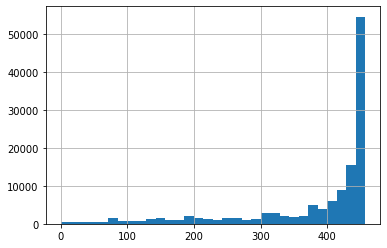

In [198]:
df['arst'].hist(bins=32)

In [151]:
# selecting rows based on condition
rslt_df = df[df['abc'] > 1]
print('\nResult dataframe :\n', rslt_df['abc'])


Result dataframe :
 4         777777.0
18        777777.0
29        777777.0
36        777777.0
49        772010.0
            ...   
438686     62021.0
438688     12016.0
438690    772019.0
438691    777777.0
438692     22019.0
Name: abc, Length: 128311, dtype: float64


In [152]:
# during what month did you recieve your most recent flu vaccine
df['HIVTSTD3'].replace([777777,999999], 0, inplace=True)
df['HIVTSTD3'].fillna(0, inplace=True)

for ind in df.index:
    v = (df['HIVTSTD3'][ind] % 10000)
    if v >= 1980:
        v=v-1980
    v = v*12
    v = v + math.floor(df['HIVTSTD3'][ind]/10000)
    df['HIVTSTD3'][ind] = v

df['HIVTSTD3'].value_counts()

0.0       346919
545.0       2922
557.0       2815
497.0       2410
533.0       1995
           ...  
72.0           6
506.0          5
86.0           4
581.0          2
1464.0         1
Name: HIVTSTD3, Length: 455, dtype: int64

In [153]:
df['HIVTSTD3'].describe()

count    436654.000000
mean         86.885099
std         178.063793
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1464.000000
Name: HIVTSTD3, dtype: float64

In [ ]:
# Days in past 30 had alcoholic beverage
HIVTSTD3
df.loc[df['ALCDAY5'] < 110, 'ALCDAY5'] = (df.loc[df['ALCDAY5'] < 110, 'ALCDAY5']-100)*4
df.loc[(df['ALCDAY5'] < 231)&(df['ALCDAY5'] > 199), 'ALCDAY5'] -= 200
df['ALCDAY5'] = df['ALCDAY5'].replace([777,888,999],0)
df['unk_ALCDAY5'] = df['unk_ALCDAY5'].fillna(0)
df['ALCDAY5'].describe()